In [19]:
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv("train.csv")
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [21]:
#z score normalization
cols=['gravity','ph','osmo','cond','urea','calc']
for i in cols:
    df[i]=((df[i]-np.mean(df[i]))/np.std(df[i]))

In [22]:
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,-0.734032,0.365623,-0.889728,-0.884388,-1.134869,-0.829136,0
1,1,1.065904,-0.865897,0.219521,0.288059,0.846384,0.020338,0
2,2,-1.334010,0.272090,-1.196904,0.407969,-0.878040,1.532589,0
3,3,0.465925,-1.629751,-0.893994,-0.084992,0.875736,0.782687,1
4,4,0.465925,-0.663242,0.949065,-0.484690,0.780342,-0.592652,1
...,...,...,...,...,...,...,...,...
409,409,-1.034021,-1.162085,-0.531355,-0.005053,-1.494430,-0.804243,0
410,410,0.915909,-0.663242,-0.318038,-0.231548,-0.401072,-1.040727,0
411,411,0.015941,0.505922,-0.838532,0.101534,-0.063525,1.109408,1
412,412,-1.484005,1.815386,-1.393156,-1.177500,-1.494430,-0.959824,1


In [23]:
X=df.drop(['id','target'],axis=1)
Y=df['target']

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import time

x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,train_size=0.80)

start=time.time()

gnb=GaussianNB()
model=gnb.fit(x_train,y_train)

end=time.time()

print(end-start)

0.0030493736267089844


In [81]:
x_train.shape

(4, 6)

In [82]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

#On Training
ypred=model.predict(x_train)
missclass_rate=((y_train!=ypred).sum()/y_train.shape[0])*100
precision=precision_score(y_train,ypred)
recall=recall_score(y_train,ypred)
f1=f1_score(y_train,ypred)
c=confusion_matrix(y_train,ypred)
sensitivity=c[0][0]/(c[0][0]+c[1][0])
specificity=c[1][1]/(c[1][1]+c[0][1])
accuracy=gnb.score(x_train,y_train)

In [83]:
#print train metrics
print(missclass_rate)
print(precision)
print(recall)
print(f1)
print(sensitivity)
print(specificity)
print(accuracy)

0.0
1.0
1.0
1.0
1.0
1.0
1.0


In [84]:
#On testing
ypred=model.predict(x_test)
missclass_rate=((y_test!=ypred).sum()/y_test.shape[0])*100
precision=precision_score(y_test,ypred)
recall=recall_score(y_test,ypred)
f1=f1_score(y_test,ypred)
c=confusion_matrix(y_test,ypred)
sensitivity=c[0][0]/(c[0][0]+c[1][0])
specificity=c[1][1]/(c[1][1]+c[0][1])
accuracy=gnb.score(x_test,y_test)

In [85]:
#print test metrics
print(missclass_rate)
print(precision)
print(recall)
print(f1)
print(sensitivity)
print(specificity)
print(accuracy)

53.170731707317074
0.453125
0.9560439560439561
0.6148409893992932
0.6923076923076923
0.453125
0.4682926829268293


In [97]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,train_size=0.80)
classifier=LogisticRegression(random_state=0).fit(x_train,y_train)

In [98]:

#On Training
ypred_l=classifier.predict(x_train)
precision=precision_score(y_train,ypred_l)
recall=recall_score(y_train,ypred_l)
accuracy=classifier.score(x_train,y_train)
c=confusion_matrix(y_train,ypred_l)
sensitivity=c[0][0]/(c[0][0]+c[1][0])
specificity=c[1][1]/(c[1][1]+c[0][1])

In [99]:
print(precision)
print(recall)
print(accuracy)
print(sensitivity)
print(specificity)

0.7456140350877193
0.5782312925170068
0.7250755287009063
0.7142857142857143
0.7456140350877193


In [100]:
#On Testing
ypred_l_test=classifier.predict(x_test)
precision=precision_score(y_test,ypred_l_test)
recall=recall_score(y_test,ypred_l_test)
accuracy=classifier.score(x_test,y_test)
c=confusion_matrix(y_test,ypred_l_test)
sensitivity=c[0][0]/(c[0][0]+c[1][0])
specificity=c[1][1]/(c[1][1]+c[0][1])

In [101]:
print(precision)
print(recall)
print(accuracy)
print(sensitivity)
print(specificity)

0.7352941176470589
0.6756756756756757
0.7469879518072289
0.7551020408163265
0.7352941176470589


Text(0.5, 1.0, 'ROC')

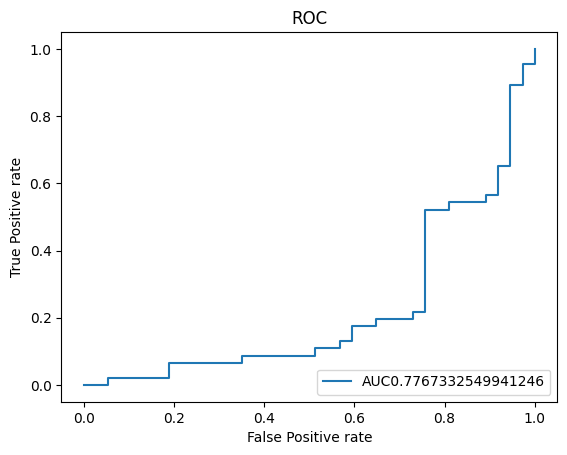

In [113]:
#Plot roc curve for test
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve


fpr,tpr,thresholds=roc_curve(y_test,classifier.decision_function(x_test))

ytest_probs=classifier.predict_proba(x_test)[::,1]
auc=roc_auc_score(y_test,ytest_probs)

label="AUC"+str(auc)
plt.plot(tpr,fpr,label=label)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc=4)
plt.title("ROC")